In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import seaborn as sns


In [30]:
df = pd.read_csv("clustering_მონაცემები.csv")

features = [
    "ასაკი",
    "შესყიდვების_რაოდენობა",
    "საშუალო_ჩეკი(ლარში)",
    "საიტზე_დახარჯული_დრო(წთ)",
    "დაბრუნების_სიხშირე(%)"
]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\becdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\becdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

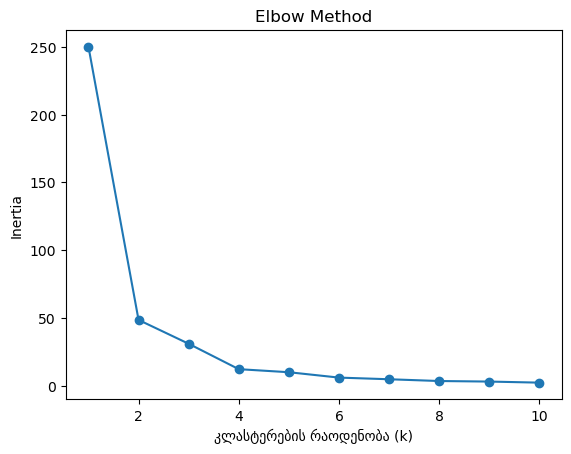

In [31]:
inertia = []

K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("კლასტერების რაოდენობა (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\becdi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


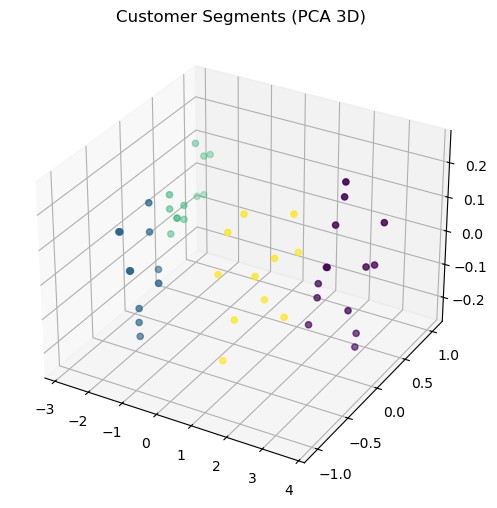

In [33]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]
df["PC3"] = X_pca[:, 2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["PC1"],
    df["PC2"],
    df["PC3"],
    c=df["Cluster"]
)

ax.set_title("Customer Segments (PCA 3D)")
plt.show()

             ასაკი  შესყიდვების_რაოდენობა  საშუალო_ჩეკი(ლარში)  \
Cluster                                                          
0        48.142857               6.714286           482.142857   
1        26.076923              16.076923           108.846154   
2        31.083333              20.250000            88.583333   
3        38.181818              10.818182           342.272727   

         საიტზე_დახარჯული_დრო(წთ)  დაბრუნების_სიხშირე(%)  
Cluster                                                   
0                       12.000000               1.571429  
1                       26.692308               5.384615  
2                       32.750000               7.416667  
3                       18.090909               3.181818  


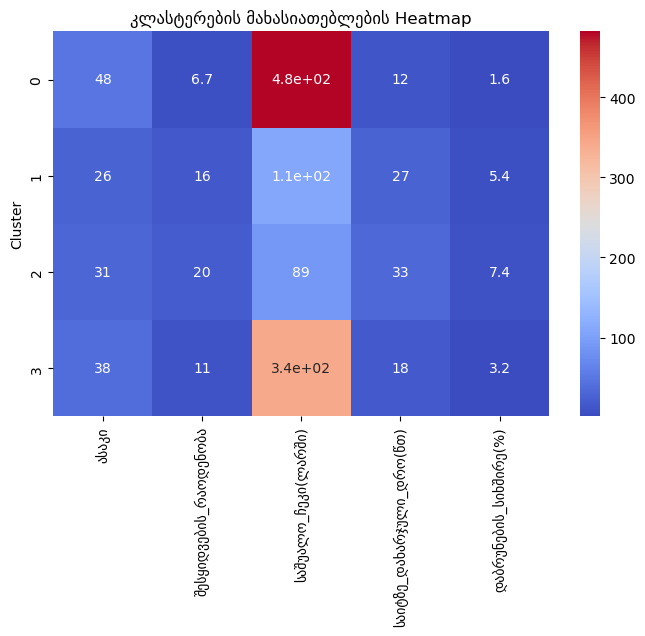

In [36]:
cluster_profile = df.groupby("Cluster")[features].mean()
print(cluster_profile)
plt.figure(figsize=(8,5))
sns.heatmap(
    cluster_profile,
    annot=True,
    cmap="coolwarm"
)

plt.title("კლასტერების მახასიათებლების Heatmap")
plt.show()

In [35]:
score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.5894275844757689


კლასტერების ოპტიმალური რაოდენობაა 4. 
კლასტერი 1: (VIP / ლოიალური მომხმარებლები) მაღალი შესყიდვების რაოდენობა, მაღალი საშუალო ჩეკი, დაბალი დაბრუნების სიხშირე, დიდხანს ატარებენ დროს საიტზე.
კლასტერი 2: (აქტიური, მაგრამ მომთხოვნი) ხშირი შესყიდვები, საშუალო/მაღალი დაბრუნების სიხშირე, დიდხანს ათვალიერებენ პროდუქტებს, ეძებენ საუკეთესო ფასს.
კლასტერი 3: (პოტენციური მომხმარებლები) საშუალო აქტივობა, დაბალი ჩეკი, იშვიათი შესყიდვები, შეიძლება საჭიროებენ მარკეტინგულ სტიმულს (პრემიუმ შეთავაზება, ფასდაკლება).
კლასტერი 4: (დაბალი ღირებულების მომხმარებლები) იშვიათი შესყიდვები, დაბალი ჩეკი, მაღალი დაბრუნების სიხშირე, ნაკლებად პრიორიტეტულია მარკეტინგისთვის.

კლასტერი 1: VIP მომხმარებლები: აქტიურად ყიდულობენ, მაღალი საშუალო ჩეკი აქვთ, დაბალი დაბრუნების სიხშირე და დიდხანს ატარებენ დროს საიტზე; ბიზნესისთვის ყველაზე ღირებულია.
კლასტერი 2: აქტიური, მაგრამ მომთხოვნი: ხშირად ყიდულობენ, თუმცა აქვთ საშუალო/მაღალი დაბრუნების სიხშირე; საჭიროებენ სპეციალურ შეთავაზებებს.
კლასტერი 3: პოტენციური მომხმარებლები: იშვიათად ყიდულობენ, დაბალი ჩეკი და საშუალო აქტივობა აქვთ; კარგი სამიზნეა targeted კამპანიებისთვის.
კლასტერი 4: დაბალი ღირებულების მომხმარებლები: იშვიათი შესყიდვები, დაბალი ჩეკი, მაღალი დაბრუნების სიხშირე; პრიორიტეტი მცირეა მარკეტინგისთვის.

ყველაზე დიდი პოტენციალი ბიზნესისთვის აქვს კლასტერი 1-ს:
VIP / ლოიალური მომხმარებლები

ძირითადი შემოსავლების წყარო
მაღალი retention (შენარჩუნება)
პოტენციური მომხმარებლები
მომავალი ზრდის წყარო
კარგი სეგმენტი targeted მარკეტინგისთვის
საჭიროებს ფასდაკლებას, შეთავაზებებს, პერსონალიზაციას